/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


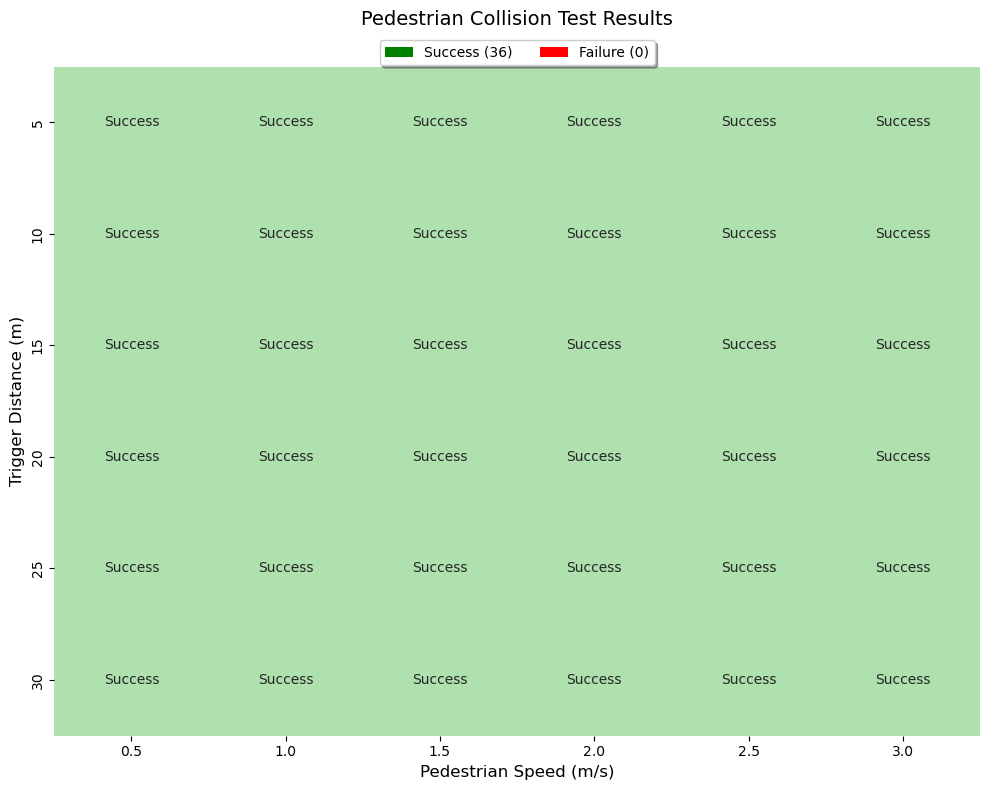

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

# just hard code the failures for now
failures = {(3.0, 5): 30, (3.0, 10): 31, (1.0, 20): 9, (1.5, 10): 13, (2.0, 10): 19, (1.0, 15): 8, (1.5, 15): 14, (2.5, 10): 25, (2.5, 10): 24}

speeds = np.arange(0.5, 3.5, 0.5)
distances = np.arange(5, 35, 5)
results = pd.DataFrame(index=distances, columns=speeds)
results.index.name = 'trigger_distance'
results.columns.name = 'ped_speed'

for speed in speeds:
    for distance in distances:
        if (speed, distance) in failures:
            results.loc[distance, speed] = 'Failure'
        else:
            results.loc[distance, speed] = 'Success'

result_map = {'Success': 0, 'Failure': 1}
numeric_results = results.applymap(lambda x: result_map.get(x, 2))

plt.figure(figsize=(10, 8))

legend_elements = [
    Patch(facecolor='green', label=f'Success ({(results == "Success").sum().sum()})'),
    Patch(facecolor='red', label=f'Failure ({(results == "Failure").sum().sum()})'),
]

plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# Create the heatmap in the figure
ax = sns.heatmap(numeric_results, cmap=['#AFE1AF', '#DE3163'],
          cbar=False, annot=results, fmt='', annot_kws={"size": 10})

plt.title('Pedestrian Collision Test Results', fontsize=14, pad=30)
plt.xlabel('Pedestrian Speed (m/s)', fontsize=12)
plt.ylabel('Trigger Distance (m)', fontsize=12)

ax.set_xticklabels([f"{x:.1f}" for x in speeds])

plt.tight_layout()
plt.savefig('collision_results.png', dpi=300, bbox_inches='tight')
plt.show()